# Plotting

## Visualizing hypergraphs
As for pairwise networks, visualizing hypergraphs is surely a hard task and no algorithm can exaustively work for any given input structure. Here we show how to visualize some toy structures using the visualization function contained in the ```drawing``` module that heavily relies on [networkx](https://networkx.org/documentation/stable/reference/drawing.html) and [matplotlib](https://matplotlib.org/).

In [1]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import random
import xgi

Les us first create a small toy hypergraph containing edges of different sizes.

In [2]:
H = xgi.Hypergraph()
H.add_edges_from(
    [[1, 2, 3], [3, 4, 5], [3, 6], [6, 7, 8, 9], [1, 4, 10, 11, 12], [1, 4]]
)

The first step for drawing a hypergraph is to choose a layout for the nodes.
At the moment the available layouts are:
* ```random_layout```: to position nodes uniformly at random in the unit square ([exactly as networkx](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.random_layout.html)).
* ```pairwise_spring_layout```: to position the nodes using the Fruchterman-Reingold force-directed algorithm on the projected graph. In this case the hypergraph is first projected into a graph (1-skeleton) using the ```xgi.convert_to_graph(H)``` function and then networkx's [spring_layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) is applied. 
* ```barycenter_spring_layout```: to position the nodes using the Fruchterman-Reingold force-directed algorithm using an augmented version of the the graph projection of the hypergraph, where _phantom nodes_ (that we call barycenters) are created for each edge of order $d>1$ (composed by more than two nodes). Weights are then assigned to all hyperedges of order 1 (links) and to all connections to phantom nodes within each hyperedge to keep them together. Weights scale with the size of the hyperedges. Finally, the weighted version of networkx's [spring_layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) is applied.
* ```weighted_barycenter_spring_layout```: same as ```barycenter_spring_layout```, but here the weighted version of the Fruchterman-Reingold force-directed algorithm is used. Weights are assigned to all hyperedges of order 1 (links) and
    to all connections to phantom nodes within each hyperedge to keep them together. Weights scale with the order of the group interaction.
    
Each layout returns a dictionary that maps nodes ID into (x, y) coordinates.

In [3]:
pos = xgi.barycenter_spring_layout(H, seed=1)

We can now pass the ```pos``` dictionary to the ```drawing``` function:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x16b887d90>,
  <matplotlib.collections.PatchCollection at 0x16b887940>))

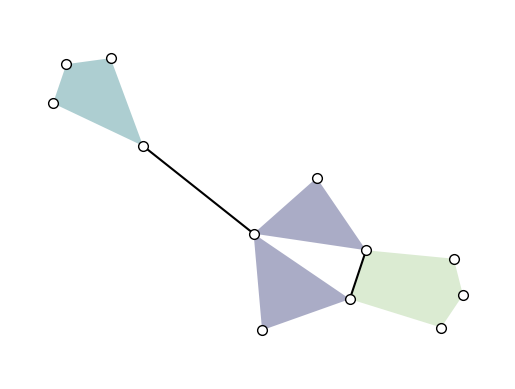

In [4]:
fig, ax = plt.subplots()

xgi.draw(H, pos, ax=ax)

**Node labels** and **Hyperedge labels** can be added to the plot. If ```True```, the IDs are shown. Otherwise any dictionary that contains (id: label) pairs can be passed. Additional keywords related to the font can be passed as well.

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x16ba6fe50>,
  <matplotlib.collections.PatchCollection at 0x16ba6fd60>))

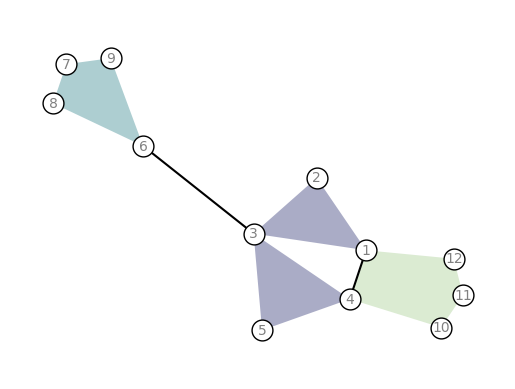

In [5]:
xgi.draw(H, pos, node_labels=True, font_color_nodes="gray", node_size=15)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x16bae08b0>,
  <matplotlib.collections.PatchCollection at 0x16ba801c0>))

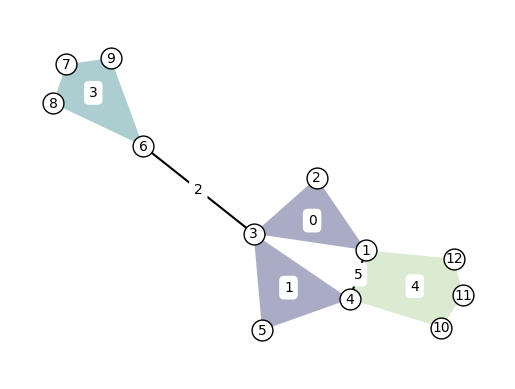

In [6]:
xgi.draw(H, pos, node_labels=True, hyperedge_labels=True, node_size=15)

For some hypergraphs, it can be helpful to rotate the positions of the nodes relative to the principal axis. We can do this by generating node positions with any of the functions previously described and then using the function `pca_transform()`. For example:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x16bb53e20>,
  <matplotlib.collections.PatchCollection at 0x16bb53e50>))

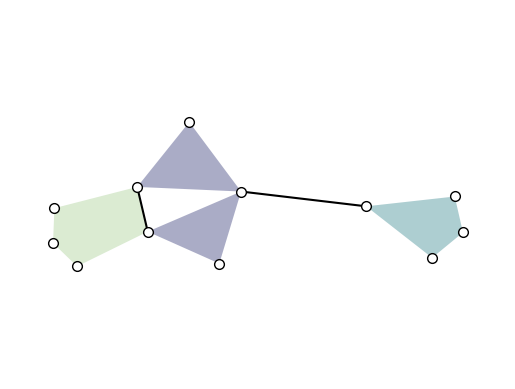

In [7]:
transformed_pos = xgi.pca_transform(pos)
xgi.draw(H, transformed_pos)

We can also rotate the node positions relative to the principal axis:

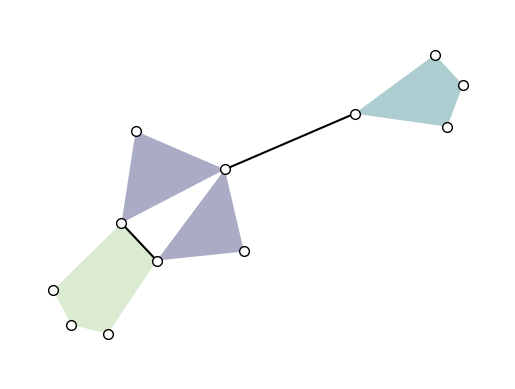

In [8]:
# rotation in degrees
transformed_pos = xgi.pca_transform(pos, 30)
xgi.draw(H, transformed_pos)

plt.show()

Other layout functions allow us to place the nodes of a hypergraph on a circle or on a spiral:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x16bbfcb80>,
  <matplotlib.collections.PatchCollection at 0x16bc3adf0>))

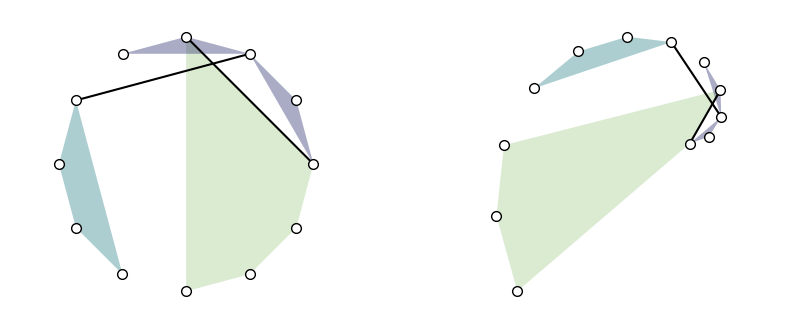

In [9]:
plt.figure(figsize=(10, 4))

ax = plt.subplot(1, 2, 1)
pos_circular = xgi.circular_layout(H)
xgi.draw(H, pos=pos_circular, ax=ax)

ax = plt.subplot(1, 2, 2)
pos_spiral = xgi.spiral_layout(H)
xgi.draw(H, pos=pos_spiral, ax=ax)

**Colors of the hyperedges** match the hyperedge size by default, but any statistic can be used to color it as well. The default colormap can be changed by updating the default arguments. Both sequential and qualitative [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) can be passed as an argument. Sequential colormaps would simply be discretized according to the sizes of the provided hypergraph:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x16bcd1c40>,
  <matplotlib.collections.PatchCollection at 0x16bb74790>))

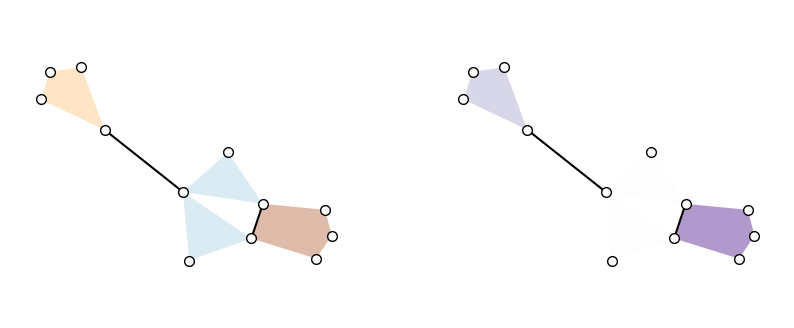

In [10]:
plt.figure(figsize=(10, 4))

# Sequential colormap
cmap = plt.cm.Paired

ax = plt.subplot(1, 2, 1)
xgi.draw(H, pos, ax=ax, edge_fc_cmap=cmap)

# Qualitative colormap
cmap = plt.cm.Purples

ax = plt.subplot(1, 2, 2)
xgi.draw(H, pos, ax=ax, edge_fc_cmap=cmap)

Some other parameters can be tweaked as well:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x16bbb9bb0>,
  <matplotlib.collections.PatchCollection at 0x16bd10490>))

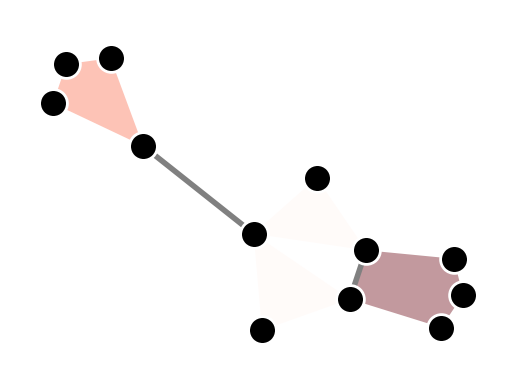

In [11]:
cmap = plt.cm.Reds
dyad_color = "gray"
dyad_lw = 4
node_fc = "black"
node_ec = "white"
node_lw = 2
node_size = 20

xgi.draw(
    H,
    pos,
    dyad_color=dyad_color,
    dyad_lw=dyad_lw,
    node_fc=node_fc,
    node_ec=node_ec,
    node_lw=node_lw,
    node_size=node_size,
    edge_fc_cmap=cmap,
)

### Visualizing a hypergraph with hyperedges of a certain order

In [12]:
# Filter only triangles
order = 2
edges_order = H.edges.filterby("order", order).members()

# Create the subgraph with only triangles
H_sub = xgi.Hypergraph(edges_order)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x16bd47c10>,
  <matplotlib.collections.PatchCollection at 0x16bd6cca0>))

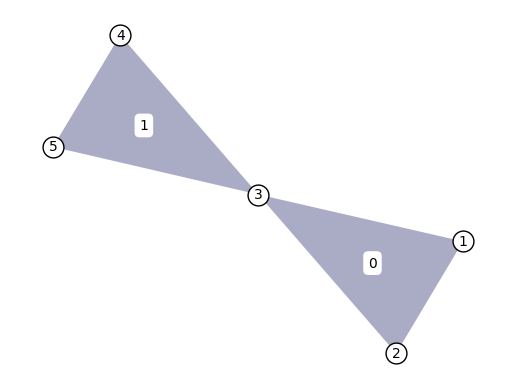

In [13]:
xgi.draw(H_sub, node_labels=True, hyperedge_labels=True, node_size=15)

## Visualizing simplicial complexes

Simplicial complexes can be visualized using the same functions for node layout and drawing.

### Technical note
By definition, a simplicial complex object contains all sub-simplices. This would make the visualization heavy since all sub-simplices contained in a maximal simplex would overlap. The automatic solution for this, implemented by default in all the layouts, is to convert the simplicial complex into a hypergraph composed by solely by its maximal simplices.

### Visual note
To visually distinguish simplicial complexes from hypergraphs, the ```draw``` function will also show all links contained in each maximal simplices (while omitting simplices of intermediate orders). 

In [14]:
SC = xgi.SimplicialComplex()
SC.add_simplices_from([[3, 4, 5], [3, 6], [6, 7, 8, 9], [1, 4, 10, 11, 12], [1, 4]])

In [15]:
pos = xgi.pairwise_spring_layout(SC)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x16bddf9d0>,
  <matplotlib.collections.PatchCollection at 0x16bd88760>))

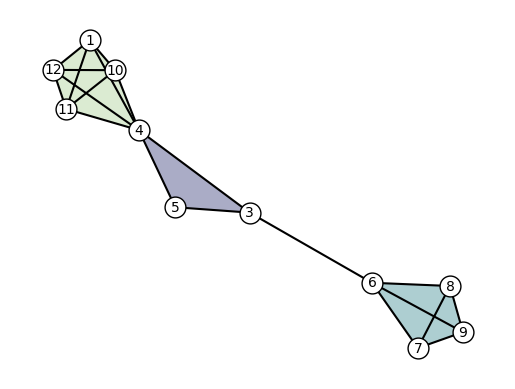

In [16]:
xgi.draw(SC, pos, node_labels=True, node_size=15)

In [17]:
H_ = xgi.convert.from_max_simplices(SC)

## Example: generative model
We generate and visualize a [random hypergraph](https://doi.org/10.1093/comnet/cnx001).

In [18]:
n = 100
is_connected = False
while not is_connected:
    H = xgi.random_hypergraph(n, [0.03, 0.0002, 0.00001])
    is_connected = xgi.is_connected(H)
pos = xgi.barycenter_spring_layout(H)

Since there are more nodes we reduce the ```node_size```.

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x16b8ae3a0>,
  <matplotlib.collections.PatchCollection at 0x16bea9e50>))

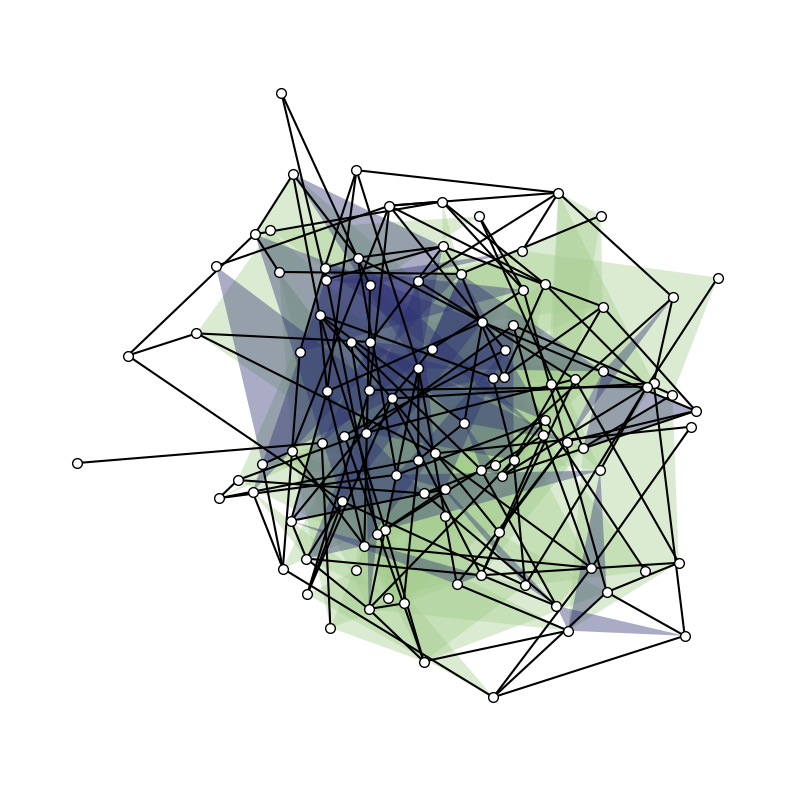

In [19]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
xgi.draw(H, pos, ax=ax)

We can even size/color the nodes and edges by NodeStats or EdgeStats (e.g., degree, centrality, size, etc.)!

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x16bba6a00>,
  <matplotlib.collections.PatchCollection at 0x16bba6760>))

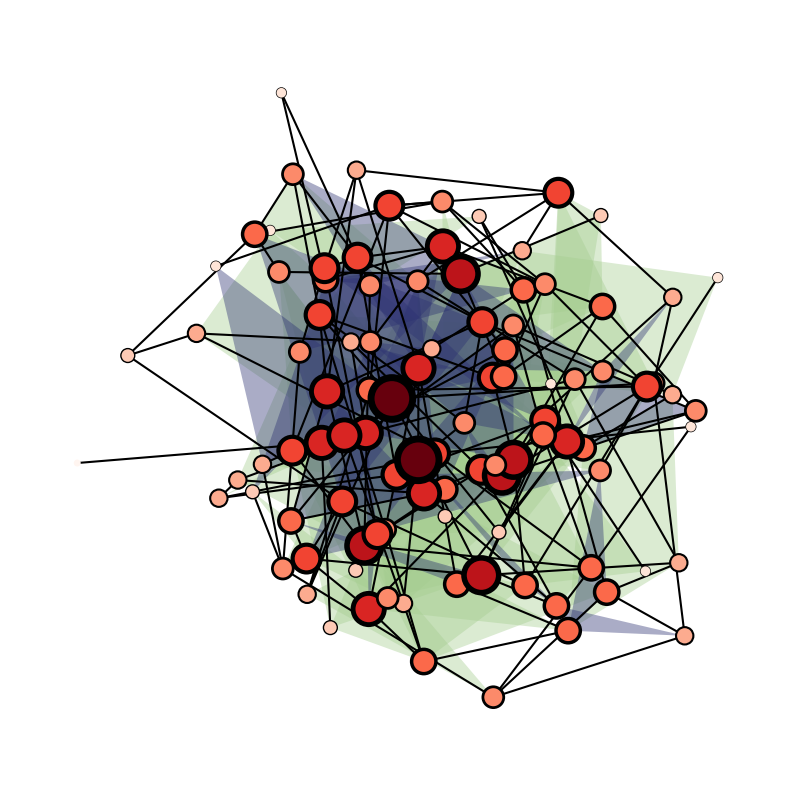

In [20]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
xgi.draw(
    H,
    pos,
    node_size=H.nodes.degree,
    node_lw=H.nodes.degree,
    node_fc=H.nodes.degree,
    ax=ax,
)

### Degree
Using its simplest (higher-order) definition, the degree is the number of hyperedges (of any size) incident on a node.

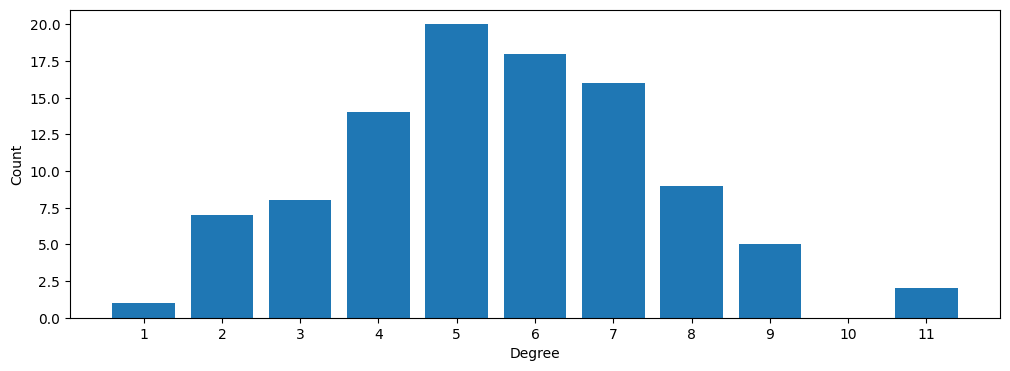

In [21]:
centers, heights = xgi.degree_histogram(H)

plt.figure(figsize=(12, 4))
ax = plt.subplot(111)

ax.bar(centers, heights)
ax.set_ylabel("Count")
ax.set_xlabel("Degree")
ax.set_xticks(np.arange(1, max(centers) + 1, step=1));